# Load center statistics from two seasons of centers positions only:
# 1996–1997
# 2024–2025

In [83]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
df1 = pd.read_csv("centers_2024-2025.csv")
print("\nCenters Stats — 2024–2025\n" + "-"*25)
df1.head()


Centers Stats — 2024–2025
-------------------------


,Unnamed: 0,Player,Team,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,1,Nikola Jokić,DEN,30,70,46,24,2570.8,2071,786,1364,57.6,138,331,41.7,361,451,80.0,200,692,892,716,230,127,45,160,4501,59,34,594
1,2,Karl-Anthony Towns,NYK,29,72,46,26,2516.7,1759,639,1215,52.6,142,338,42.0,339,409,82.9,212,708,920,222,192,71,50,249,3367,58,1,378
2,3,Jaren Jackson Jr.,MEM,25,74,42,32,2207.0,1641,592,1213,48.8,146,389,37.5,311,398,78.1,91,326,417,148,153,92,113,257,2825,6,0,331
3,4,Alperen Sengun,HOU,22,76,52,24,2395.0,1451,567,1143,49.6,21,90,23.3,296,428,69.2,262,524,786,372,194,84,61,209,3193,45,4,410
4,5,Bam Adebayo,MIA,27,78,36,42,2673.7,1410,540,1113,48.5,79,221,35.7,251,328,76.5,185,564,749,337,161,98,53,162,3106,38,1,27


In [84]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
df2 = pd.read_csv("centers_1996-1997.csv")
print("\nCenters Stats — 1996–1997\n" + "-"*25)
df2.head()


Centers Stats — 1996–1997
-------------------------


,Unnamed: 0,Player,Team,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,1,Shaquille O'Neal,LAL,25,51,38,13,38.1,26.2,10.8,19.4,55.7,0.0,0.1,0.0,4.5,9.4,48.4,3.8,8.7,12.5,3.1,2.9,0.9,2.9,3.5,54.4,44,0,5.2
1,2,Hakeem Olajuwon,HOU,34,78,54,24,36.5,23.2,9.3,18.3,51.0,0.1,0.2,31.3,4.5,5.7,78.7,2.2,7.0,9.2,3.0,3.6,1.5,2.2,3.2,46.3,28,1,4.9
2,3,Patrick Ewing,NYK,34,78,54,24,37.0,22.4,8.4,17.2,48.8,0.0,0.1,22.2,5.6,7.5,75.4,2.2,8.4,10.7,2.0,3.4,0.9,2.4,3.2,44.8,47,0,4.0
3,4,Chris Webber,WAS,24,72,40,32,39.0,20.1,8.4,16.2,51.8,0.8,2.1,39.7,2.5,4.3,56.5,3.3,7.0,10.3,4.6,3.2,1.7,1.9,3.6,46.9,41,2,2.2
4,5,Alonzo Mourning,MIA,27,66,49,17,35.2,19.8,7.2,13.4,53.4,0.0,0.1,11.1,5.5,8.6,64.2,2.9,7.1,9.9,1.6,3.4,0.8,2.9,4.1,41.9,32,0,7.0


# Data Cleaning, Transformation, Data Analysis

*Convert raw statistics into comparable per-game metrics*<br>
*Gives fair comparison between eras with different playing styles and season structures*

In [85]:
def build_analysis_dataset(df, season_label, stats_are_totals):
    data = df.copy()

    if stats_are_totals:
        three_point_attempts = data["3PA"] / data["GP"]
        assists = data["AST"] / data["GP"]
        free_throws_attempted = data["FTA"] / data["GP"]
    else:
        three_point_attempts = data["3PA"]
        assists = data["AST"]
        free_throws_attempted = data["FTA"]

    analysis = pd.DataFrame({
        "Player": data["Player"],
        "GP": data["GP"],
        "Three_Point_Attempts_Per_Game": three_point_attempts,
        "Three_Point_Percentage": data["3P%"],
        "Assists_Per_Game": assists,
        "Free_Throws_Attempted_Per_Game": free_throws_attempted,
        "Free_Throw_Percentage": data["FT%"],
        "Season": season_label
    })

    return analysis

In [86]:
analysis_1996_1997 = build_analysis_dataset(df2, "1996–1997", stats_are_totals=False)
analysis_2024_2025 = build_analysis_dataset(df1, "2024–2025", stats_are_totals=True)

analysis_1996_1997 = analysis_1996_1997.round(1)
analysis_2024_2025 = analysis_2024_2025.round(1)

In [87]:
analysis_1996_1997.head()

,Player,GP,Three_Point_Attempts_Per_Game,Three_Point_Percentage,Assists_Per_Game,Free_Throws_Attempted_Per_Game,Free_Throw_Percentage,Season
0,Shaquille O'Neal,51,0.1,0.0,3.1,9.4,48.4,1996–1997
1,Hakeem Olajuwon,78,0.2,31.3,3.0,5.7,78.7,1996–1997
2,Patrick Ewing,78,0.1,22.2,2.0,7.5,75.4,1996–1997
3,Chris Webber,72,2.1,39.7,4.6,4.3,56.5,1996–1997
4,Alonzo Mourning,66,0.1,11.1,1.6,8.6,64.2,1996–1997


In [88]:
analysis_2024_2025.head()

,Player,GP,Three_Point_Attempts_Per_Game,Three_Point_Percentage,Assists_Per_Game,Free_Throws_Attempted_Per_Game,Free_Throw_Percentage,Season
0,Nikola Jokić,70,4.7,41.7,10.2,6.4,80.0,2024–2025
1,Karl-Anthony Towns,72,4.7,42.0,3.1,5.7,82.9,2024–2025
2,Jaren Jackson Jr.,74,5.3,37.5,2.0,5.4,78.1,2024–2025
3,Alperen Sengun,76,1.2,23.3,4.9,5.6,69.2,2024–2025
4,Bam Adebayo,78,2.8,35.7,4.3,4.2,76.5,2024–2025


*Keep only players with at least 40 games played*<br>
*Removes small-sample noise and focuses on rotation-level centers*

In [89]:
# Filter players who played at least 40 games
filtered_1996_1997 = analysis_1996_1997[analysis_1996_1997['GP'] >= 40]
numeric_cols_1996_1997 = filtered_1996_1997.select_dtypes(include='number')
# Compute min and max
summary_40_plus = numeric_cols_1996_1997.agg(['min', 'max'])
summary_40_plus

,GP,Three_Point_Attempts_Per_Game,Three_Point_Percentage,Assists_Per_Game,Free_Throws_Attempted_Per_Game,Free_Throw_Percentage
min,49,0.0,0.0,0.2,0.9,48.4
max,82,5.3,50.0,4.6,9.4,82.9


In [90]:
# Filter players who played at least 40 games
filtered_2024_2025 = analysis_2024_2025[analysis_2024_2025['GP'] >= 40]
numeric_cols_2024_2025 = filtered_2024_2025.select_dtypes(include='number')
# Compute min and max
summary_40_plus_2024_2025 = numeric_cols_2024_2025.agg(['min', 'max'])
summary_40_plus_2024_2025

,GP,Three_Point_Attempts_Per_Game,Three_Point_Percentage,Assists_Per_Game,Free_Throws_Attempted_Per_Game,Free_Throw_Percentage
min,40,0.0,0.0,0.4,0.2,23.3
max,82,8.8,50.0,10.2,7.2,90.9


*Datasets combined for further analysis*

In [91]:
centers_analysis_combined = pd.concat(
    [filtered_1996_1997, filtered_2024_2025],
    ignore_index=True
)

centers_analysis_combined.head()

,Player,GP,Three_Point_Attempts_Per_Game,Three_Point_Percentage,Assists_Per_Game,Free_Throws_Attempted_Per_Game,Free_Throw_Percentage,Season
0,Shaquille O'Neal,51,0.1,0.0,3.1,9.4,48.4,1996–1997
1,Hakeem Olajuwon,78,0.2,31.3,3.0,5.7,78.7,1996–1997
2,Patrick Ewing,78,0.1,22.2,2.0,7.5,75.4,1996–1997
3,Chris Webber,72,2.1,39.7,4.6,4.3,56.5,1996–1997
4,Alonzo Mourning,66,0.1,11.1,1.6,8.6,64.2,1996–1997


In [92]:
centers_analysis_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Player                          114 non-null    object 
 1   GP                              114 non-null    int64  
 2   Three_Point_Attempts_Per_Game   114 non-null    float64
 3   Three_Point_Percentage          114 non-null    float64
 4   Assists_Per_Game                114 non-null    float64
 5   Free_Throws_Attempted_Per_Game  114 non-null    float64
 6   Free_Throw_Percentage           114 non-null    float64
 7   Season                          114 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 7.3+ KB


In [93]:
centers_analysis_combined.isna().sum()

Player                            0
GP                                0
Three_Point_Attempts_Per_Game     0
Three_Point_Percentage            0
Assists_Per_Game                  0
Free_Throws_Attempted_Per_Game    0
Free_Throw_Percentage             0
Season                            0
dtype: int64

*The diffrences between season 1996-1997 to 2024-2025 based on precentages*

In [94]:
centers_analysis_combined.groupby("Season")[[
    "Three_Point_Attempts_Per_Game",
    "Three_Point_Percentage",
    "Free_Throws_Attempted_Per_Game",
    "Free_Throw_Percentage",
    "Assists_Per_Game"
]].mean()

,Three_Point_Attempts_Per_Game,Three_Point_Percentage,Free_Throws_Attempted_Per_Game,Free_Throw_Percentage,Assists_Per_Game
Season,,,,,
1996–1997,0.402381,12.454762,3.597619,69.042857,1.521429
2024–2025,2.054167,24.626389,2.337500,70.911111,1.995833


*Percentage gap between both seasons*

In [95]:
key_stats = [
    "Three_Point_Attempts_Per_Game",
    "Three_Point_Percentage",
    "Free_Throws_Attempted_Per_Game",
    "Free_Throw_Percentage",
    "Assists_Per_Game"
]

# Era averages
era_means = centers_analysis_combined.groupby("Season")[key_stats].mean()

# Percent change from 1996–1997 to 2024–2025
percent_change = (
    (era_means.loc["2024–2025"] - era_means.loc["1996–1997"])
    / era_means.loc["1996–1997"]
) * 100

era_profile = pd.DataFrame({
    "1996–1997 Avg": era_means.loc["1996–1997"],
    "2024–2025 Avg": era_means.loc["2024–2025"],
    "Percent Change (%)": percent_change.round(2)
})

era_profile

,1996–1997 Avg,2024–2025 Avg,Percent Change (%)
Three_Point_Attempts_Per_Game,0.402381,2.054167,410.50
Three_Point_Percentage,12.454762,24.626389,97.73
Free_Throws_Attempted_Per_Game,3.597619,2.337500,-35.03
Free_Throw_Percentage,69.042857,70.911111,2.71
Assists_Per_Game,1.521429,1.995833,31.18


*Some visualization for the above*

In [96]:
import matplotlib.pyplot as plt

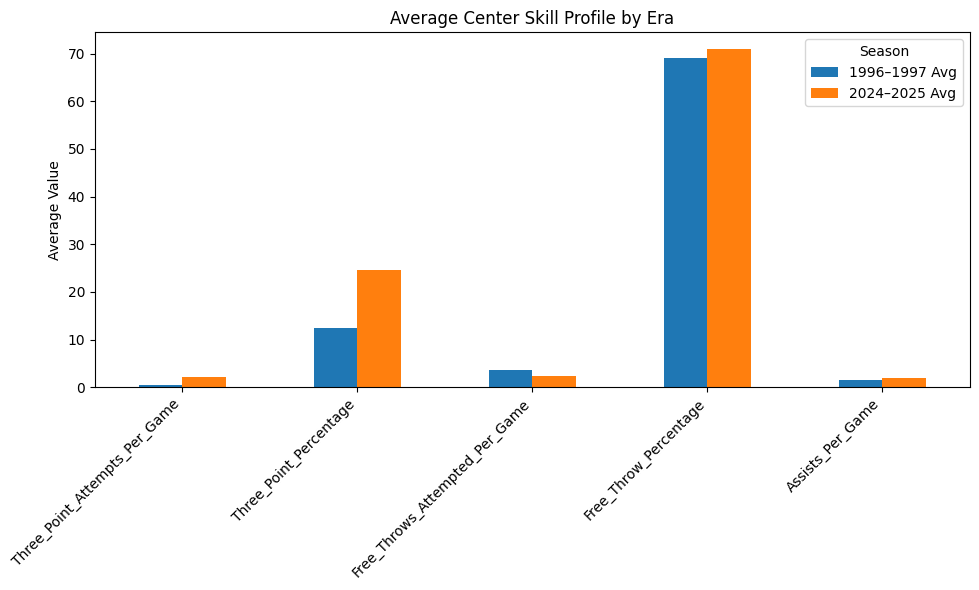

In [97]:
era_profile[["1996–1997 Avg", "2024–2025 Avg"]].plot(
    kind="bar",
    figsize=(10, 6)
)

plt.title("Average Center Skill Profile by Era")
plt.ylabel("Average Value")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Season")
plt.tight_layout()
plt.show()

*More in-depth analysis on free throw, but for players who have at least 2.84% attempts per game. It gives us better results based on the real situation*

In [98]:
# Filter players with more than 2.84 free throw attempts per game to better understand the 'Free_Throw_Percentage' in real situations	
fta_filtered = centers_analysis_combined[
    centers_analysis_combined["Free_Throws_Attempted_Per_Game"] > 2.84
]

# Compute season averages
season_means = fta_filtered.groupby("Season")[
    "Free_Throw_Percentage"
].mean()

# Calculate percentage change from 1996–1997 to 2024–2025
percent_change = (
    (season_means.loc["2024–2025"] - season_means.loc["1996–1997"])
    / season_means.loc["1996–1997"]
) * 100

pd.DataFrame({
    "1996–1997 Avg FT%": [round(season_means.loc["1996–1997"], 2)],
    "2024–2025 Avg FT%": [round(season_means.loc["2024–2025"], 2)],
    "Percent Change (%)": [round(percent_change, 2)]
})

,1996–1997 Avg FT%,2024–2025 Avg FT%,Percent Change (%)
0,68.59,76.4,11.39


*Some data visualization for three-point attempts and assists per game*

<Figure size 600x400 with 0 Axes>

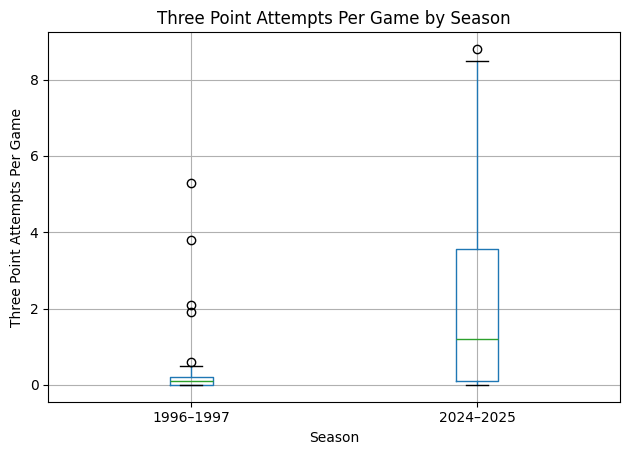

<Figure size 600x400 with 0 Axes>

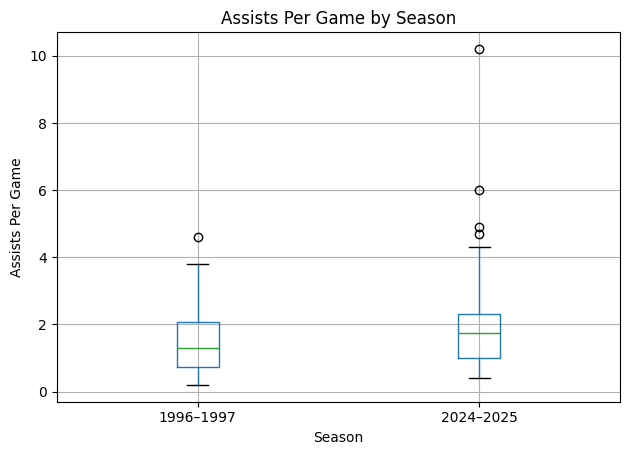

In [99]:
# Stats to visualize
stats_to_plot = [
    "Three_Point_Attempts_Per_Game",
    "Assists_Per_Game"
]

for stat in stats_to_plot:
    plt.figure(figsize=(6, 4))
    centers_analysis_combined.boxplot(
        column=stat,
        by="Season"
    )
    plt.title(f"{stat.replace('_', ' ')} by Season")
    plt.suptitle("")
    plt.xlabel("Season")
    plt.ylabel(stat.replace('_', ' '))
    plt.tight_layout()
    plt.show()

*Centers are classified as either:*<br>
*Traditional Centers, old school play, make points in the paint, fewer 3pt shots, lower free throw %* <br>
*Stretch Centers, the modern center where he knows how to shoot from 3pt, higher free throw % since the shot improvement, knows how to pass from outside since he plays outside the paint*<br>
*This shows how center roles have structurally changed over time*<br>

In [100]:
def classify_center(row):
    if row["Three_Point_Attempts_Per_Game"] >= 2:
        return "Stretch Center"
    else:
        return "Traditional Center"

centers_analysis_combined["Center_Archetype"] = (
    centers_analysis_combined.apply(classify_center, axis=1)
)

# Keep only Stretch and Traditional Centers
archetype_filtered = centers_analysis_combined[
    centers_analysis_combined["Center_Archetype"].isin(
        ["Stretch Center", "Traditional Center"]
    )
]

archetype_distribution = (
    archetype_filtered
    .groupby(["Season", "Center_Archetype"])
    .size()
    .unstack()
)

archetype_percentages = (
    archetype_distribution
    .div(archetype_distribution.sum(axis=1), axis=0)
    * 100
).round(1)

archetype_percentages

Center_Archetype,Stretch Center,Traditional Center
Season,,
1996–1997,7.1,92.9
2024–2025,43.1,56.9


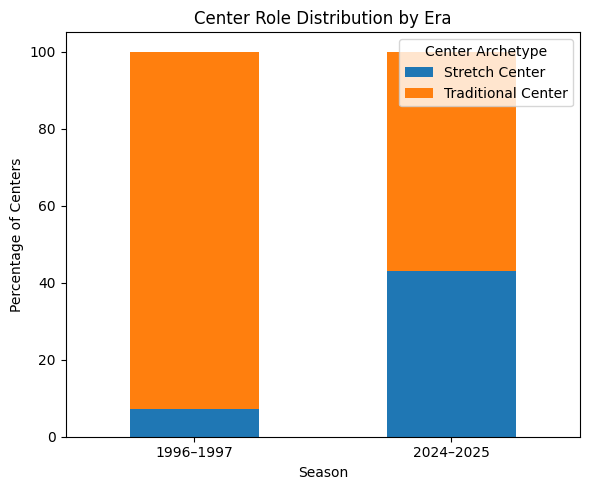

In [101]:
archetype_percentages.plot(
    kind="bar",
    stacked=True,
    figsize=(6, 5)
)

plt.title("Center Role Distribution by Era")
plt.ylabel("Percentage of Centers")
plt.xlabel("Season")
plt.legend(title="Center Archetype")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Prediction for 2044**

In [102]:
projection_stats = [
    "Three_Point_Attempts_Per_Game",
    "Three_Point_Percentage",
    "Assists_Per_Game",
    "Free_Throw_Percentage"
]

season_years = {
    "1996–1997": 1997,
    "2024–2025": 2025
}

# Target future year
future_year = 2044

projection_results = {}

for stat in projection_stats:
    past_value = era_means.loc["1996–1997", stat]
    recent_value = era_means.loc["2024–2025", stat]
    
    yearly_change = (
        recent_value - past_value
    ) / (season_years["2024–2025"] - season_years["1996–1997"])
    
    projected_value = recent_value + yearly_change * (future_year - season_years["2024–2025"])
    
    projection_results[stat] = {
        "2024–2025 Avg": recent_value,
        f"Projected {future_year} Avg": projected_value
    }

future_projection = (
    pd.DataFrame.from_dict(projection_results, orient="index")
    .round(2)
)

future_projection

,2024–2025 Avg,Projected 2044 Avg
Three_Point_Attempts_Per_Game,2.05,3.18
Three_Point_Percentage,24.63,32.89
Assists_Per_Game,2.00,2.32
Free_Throw_Percentage,70.91,72.18


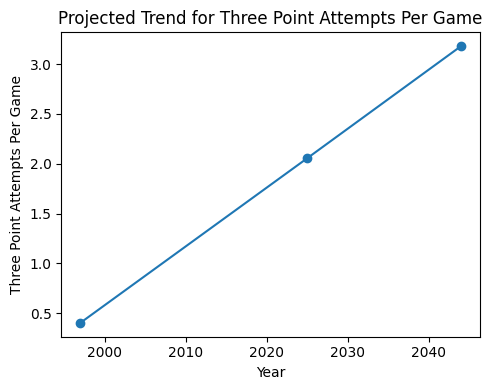

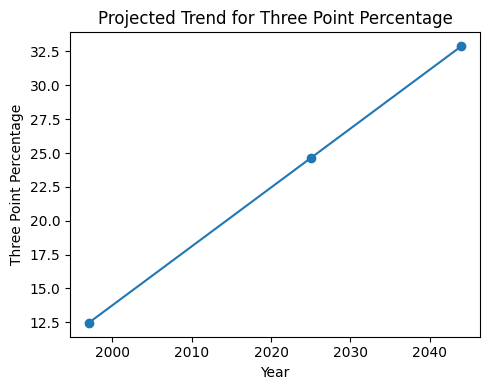

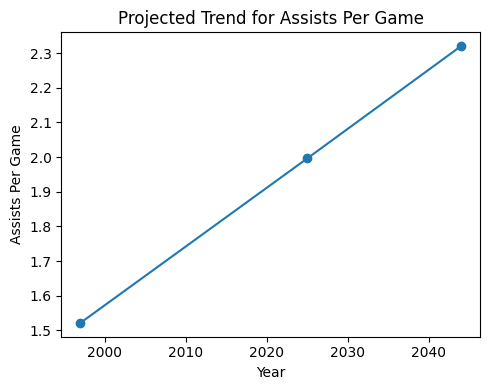

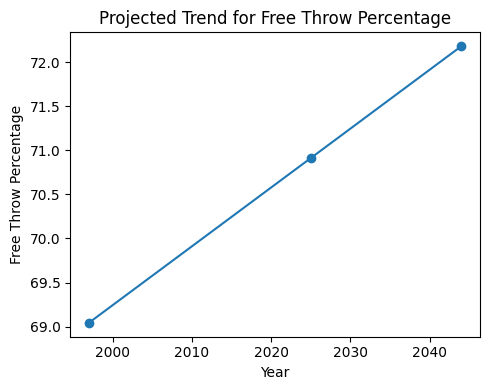

In [103]:
for stat in projection_stats:
    plt.figure(figsize=(5, 4))
    
    years = [1997, 2025, future_year]
    values = [
        era_means.loc["1996–1997", stat],
        era_means.loc["2024–2025", stat],
        future_projection.loc[stat, f"Projected {future_year} Avg"]
    ]
    
    plt.plot(years, values, marker="o")
    plt.title(f"Projected Trend for {stat.replace('_', ' ')}")
    plt.xlabel("Year")
    plt.ylabel(stat.replace('_', ' '))
    plt.tight_layout()
    plt.show()

The analysis shows a significant change in how NBA centers play between the two seasons. Modern centers attempt far more three-point shots, and their three-point shooting percentages have increased, indicating clear improvement in outside shooting ability.

At the same time, free-throw attempts per game have decreased. This suggests that fewer centers are consistently playing in the paint and drawing contact near the basket. Instead, centers now spend more time operating on the perimeter and facing the basket.

Despite fewer trips to the free-throw line, free-throw percentages have improved. This reflects overall improvements in shooting technique and skill development. Playing more outside the paint also allows centers to see the floor better, leading to increased passing and higher assist numbers.

Overall, the center position has evolved from a primarily interior, physical role into a more versatile and skill-based role that emphasizes shooting, spacing, and playmaking in the modern NBA.